In [8]:
from langgraph.graph import StateGraph,START,END

In [9]:
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace

In [10]:
from dotenv import load_dotenv
load_dotenv()


True

In [11]:
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    task="text-generation",
    max_new_tokens=512,
    temperature=0.7
)

model=ChatHuggingFace(llm=llm)

In [12]:
# response = model.invoke("Explain the theory of relativity in simple terms.")
# print(response.content)

Make a Blog Prompt chaining Graph

In [13]:
from typing import TypedDict

In [16]:
class PROMPT_STATE(TypedDict):
    title: str
    outline: str
    content: str



In [18]:
def create_outline(state: PROMPT_STATE)->PROMPT_STATE:
    title=state['title']

    prompt=f"create a detailed outline for an article with the title: {title}"

    response=model.invoke(prompt)

    outline=response.content

    #the outline will be stored in the state
    state['outline']=outline
    return state

In [20]:
def create_blog(state:PROMPT_STATE)->PROMPT_STATE:
    title=state['title']
    outline=state['outline']

    prompt=f"Write a detailed blog article with the title: {title} based on the following outline: {outline}"

    response=model.invoke(prompt)
    content=response.content
    state['content']=content
    return state



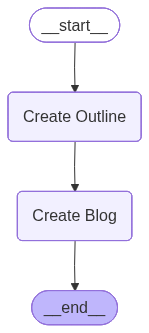

In [22]:
graph=StateGraph(PROMPT_STATE)

# Define NODES

graph.add_node("Create Outline",create_outline)
graph.add_node("Create Blog",create_blog)

# ADD EDGES
graph.add_edge(START,"Create Outline")
graph.add_edge("Create Outline","Create Blog")
graph.add_edge("Create Blog",END)

graph.compile()

In [25]:
workflow=graph.compile()

initial_state={'title':'Rise of AI in Modern Technology'}
output=workflow.invoke(initial_state)
print(output)


{'title': 'Rise of AI in Modern Technology', 'outline': " I. Introduction\n\n* Brief overview of Artificial Intelligence (AI) and its significance in modern technology\n* Historical context of AI development\n* Thesis statement: AI is rapidly advancing and transforming various sectors of modern technology\n\nII. AI in Business and Industry\n\n* Description of AI applications in marketing and sales, such as predictive analytics and personalized recommendations\n* Discussion of AI's impact on customer service, including chatbots and virtual assistants\n* Analysis of AI's role in manufacturing and production, including automation and quality control\n\nIII. AI in Healthcare\n\n* Description of AI applications in healthcare, such as medical diagnosis, drug discovery, and patient monitoring\n* Discussion of AI's potential to revolutionize telemedicine and remote patient care\n* Analysis of ethical considerations and potential challenges, such as data privacy and bias in AI algorithms\n\nIV.